In [ ]:
!pip install kaggle

!pip install xgboost

In [ ]:

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Make a directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c costa-rican-household-poverty-prediction

# Unzip the dataset
!unzip costa-rican-household-poverty-prediction.zip


Saving kaggle.json to kaggle.json
 86% 2.00M/2.33M [00:00<00:00, 2.74MB/s]
100% 2.33M/2.33M [00:00<00:00, 2.71MB/s]
Archive:  costa-rican-household-poverty-prediction.zip
  inflating: codebook.csv            
  inflating: codebook.xlsx           
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


In [ ]:
# Cargar los datos de entrenamiento y prueba
import pandas as pd

# Cargar datos de entrenamiento
train_data = pd.read_csv(r"/content/train.csv")
df = pd.DataFrame(train_data, columns=["v2a1", "abastaguadentro", "noelec", "escolari",
                                             "dependency", "overcrowding", "v14a", "tipovivi1",
                                             "tipovivi2", "tipovivi3", "tipovivi4", "tipovivi5",
                                             "rooms", "area1", "area2", "Target"])




In [ ]:
df.head()

,v2a1,abastaguadentro,noelec,escolari,dependency,overcrowding,v14a,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,rooms,area1,area2,Target
0,190000.0,1,0,10,no,1.000000,1,0,0,1,0,0,3,1,0,4
1,135000.0,1,0,12,8,1.000000,1,0,0,1,0,0,4,1,0,4
2,NaN,1,0,11,8,0.500000,1,1,0,0,0,0,8,1,0,4
3,180000.0,1,0,9,yes,1.333333,1,0,0,1,0,0,5,1,0,4
4,180000.0,1,0,11,yes,1.333333,1,0,0,1,0,0,5,1,0,4


In [ ]:
df['v2a1'].mean()


165231.6069707082

In [ ]:
df['v2a1'].max()

2353477.0

In [ ]:
filtered_df = df[df['v2a1'] > 1000000]
filtered_df.head()

,v2a1,abastaguadentro,noelec,escolari,dependency,overcrowding,v14a,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,rooms,area1,area2,Target
4441,2353477.0,1,0,19,no,0.833333,1,0,1,0,0,0,9,1,0,4
4442,2353477.0,1,0,14,no,0.833333,1,0,1,0,0,0,9,1,0,4


In [ ]:
df.describe()

,v2a1,abastaguadentro,noelec,escolari,overcrowding,v14a,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,rooms,area1,area2,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,0.964738,0.002197,7.200272,1.605380,0.994768,0.61850,0.100555,0.181647,0.017056,0.082243,4.955530,0.714555,0.285445,3.302292
std,1.504571e+05,0.184451,0.046827,4.730877,0.819946,0.072145,0.48578,0.300754,0.385573,0.129485,0.274750,1.468381,0.451650,0.451650,1.009565
min,0.000000e+00,0.000000,0.000000,0.000000,0.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,1.000000,0.000000,4.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000
50%,1.300000e+05,1.000000,0.000000,6.000000,1.500000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,4.000000
75%,2.000000e+05,1.000000,0.000000,11.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,4.000000
max,2.353477e+06,1.000000,1.000000,21.000000,6.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,4.000000


In [ ]:
#Valores binarios
test = df['abastaguadentro'].isin([0,1]).all()
print("Abastecimiento de agua en la vivienda es binario: " + str(test))

test = df['noelec'].isin([0,1]).all()
print("Electricidad nula en la vivienda es binario: " + str(test))

test = df['v14a'].isin([0,1]).all()
print("Tiene Baños en la Vivienda es binario: " + str(test))

test = df['tipovivi1'].isin([0,1]).all()
print("Tipo de vivienda 1 es binario: " + str(test))

test = df['tipovivi2'].isin([0,1]).all()
print("Tipo de vivienda 2 es binario: " + str(test))

test = df['tipovivi3'].isin([0,1]).all()
print("Tipo de vivienda 3 es binario: " + str(test))

test = df['tipovivi4'].isin([0,1]).all()
print("Tipo de vivienda 4 es binario: " + str(test))

test = df['tipovivi5'].isin([0,1]).all()
print("Tipo de vivienda 5 es binario: " + str(test))

test = df['area1'].isin([0,1]).all()
print("Area urbano es binario: " + str(test))

test = df['area2'].isin([0,1]).all()
print("Area rural es binario: " + str(test))

#Valores enteros
test = pd.api.types.is_integer_dtype(df['escolari'])
print("Años de escolaridad es entero: " + str(test))

test = pd.api.types.is_integer_dtype(df['rooms'])
print("Número de habitaciones es entero: " + str(test))

#Valores flotantes
test = pd.api.types.is_float_dtype(df['v2a1'])
print("Pago de renta mensual es flotante: " + str(test))

test = pd.api.types.is_float_dtype(df['dependency'])
print("Tasa de dependencia es flotante: " + str(test))

test = pd.api.types.is_float_dtype(df['overcrowding'])
print("Superpoblación en habitaciones es flotante: " + str(test))

Abastecimiento de agua en la vivienda es binario: True
Electricidad nula en la vivienda es binario: True
Tiene Baños en la Vivienda es binario: True
Tipo de vivienda 1 es binario: True
Tipo de vivienda 2 es binario: True
Tipo de vivienda 3 es binario: True
Tipo de vivienda 4 es binario: True
Tipo de vivienda 5 es binario: True
Area urbano es binario: True
Area rural es binario: True
Años de escolaridad es entero: True
Número de habitaciones es entero: True
Pago de renta mensual es flotante: True
Tasa de dependencia es flotante: False
Superpoblación en habitaciones es flotante: True


In [ ]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   v2a1             2697 non-null   float64
 1   abastaguadentro  9557 non-null   int64  
 2   noelec           9557 non-null   int64  
 3   escolari         9557 non-null   int64  
 4   dependency       9557 non-null   object 
 5   overcrowding     9557 non-null   float64
 6   v14a             9557 non-null   int64  
 7   tipovivi1        9557 non-null   int64  
 8   tipovivi2        9557 non-null   int64  
 9   tipovivi3        9557 non-null   int64  
 10  tipovivi4        9557 non-null   int64  
 11  tipovivi5        9557 non-null   int64  
 12  rooms            9557 non-null   int64  
 13  area1            9557 non-null   int64  
 14  area2            9557 non-null   int64  
 15  Target           9557 non-null   int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 1.2+ MB


,0
v2a1,6860
abastaguadentro,0
noelec,0
escolari,0
dependency,0
overcrowding,0
v14a,0
tipovivi1,0
tipovivi2,0
tipovivi3,0


In [ ]:
# Convertir a numérico, forzando errores a NaN
df['dependency_num'] = pd.to_numeric(df['dependency'], errors='coerce')

# Calcular el promedio de los valores no nulos
promedio = df['dependency_num'].mean()

# Reemplazar "no" por 0 y "yes" por el promedio
df['dependency'] = df['dependency'].replace({'no': 0.0, 'yes': promedio})

# Convertir la columna a tipo float
df['dependency'] = pd.to_numeric(df['dependency'], errors='coerce')

df.drop(columns=['dependency_num'], inplace=True)

# Resultado final
df.info()
print(df['dependency'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   v2a1             2697 non-null   float64
 1   abastaguadentro  9557 non-null   int64  
 2   noelec           9557 non-null   int64  
 3   escolari         9557 non-null   int64  
 4   dependency       9557 non-null   float64
 5   overcrowding     9557 non-null   float64
 6   v14a             9557 non-null   int64  
 7   tipovivi1        9557 non-null   int64  
 8   tipovivi2        9557 non-null   int64  
 9   tipovivi3        9557 non-null   int64  
 10  tipovivi4        9557 non-null   int64  
 11  tipovivi5        9557 non-null   int64  
 12  rooms            9557 non-null   int64  
 13  area1            9557 non-null   int64  
 14  area2            9557 non-null   int64  
 15  Target           9557 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 1.2 MB
0       0.0000

In [ ]:
import numpy as np

# Reemplazar los valores 0 por NaN
df['v2a1'].replace(0, np.nan, inplace=True)


# Calcular el promedio de los valores float, ignorando NaN
promedio_float = df['v2a1'].mean()

# Reemplazar los NaN en la columna de floats con el promedio
df['v2a1'].fillna(promedio_float, inplace=True)


# Resultado final
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   v2a1             9557 non-null   float64
 1   abastaguadentro  9557 non-null   int64  
 2   noelec           9557 non-null   int64  
 3   escolari         9557 non-null   int64  
 4   dependency       9557 non-null   float64
 5   overcrowding     9557 non-null   float64
 6   v14a             9557 non-null   int64  
 7   tipovivi1        9557 non-null   int64  
 8   tipovivi2        9557 non-null   int64  
 9   tipovivi3        9557 non-null   int64  
 10  tipovivi4        9557 non-null   int64  
 11  tipovivi5        9557 non-null   int64  
 12  rooms            9557 non-null   int64  
 13  area1            9557 non-null   int64  
 14  area2            9557 non-null   int64  
 15  Target           9557 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 1.2 MB


<ipython-input-12-d84d593391de>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['v2a1'].replace(0, np.nan, inplace=True)
<ipython-input-12-d84d593391de>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
v2a1,0
abastaguadentro,0
noelec,0
escolari,0
dependency,0
overcrowding,0
v14a,0
tipovivi1,0
tipovivi2,0
tipovivi3,0


In [ ]:
df.sample(10)

,v2a1,abastaguadentro,noelec,escolari,dependency,overcrowding,v14a,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,rooms,area1,area2,Target
9476,167027.602699,1,0,1,2.000000,3.000000,1,0,1,0,0,0,4,0,1,2
8025,167027.602699,1,0,11,2.000000,1.500000,1,1,0,0,0,0,3,1,0,2
3987,167027.602699,1,0,9,1.565371,2.000000,1,1,0,0,0,0,7,1,0,1
8811,120000.000000,1,0,6,0.000000,1.000000,1,0,1,0,0,0,4,1,0,3
5458,50000.000000,1,0,0,1.565371,1.333333,1,0,0,1,0,0,6,0,1,2
1606,75000.000000,1,0,11,0.000000,1.000000,1,0,0,1,0,0,5,1,0,4
5769,167027.602699,1,0,6,0.500000,3.000000,1,1,0,0,0,0,2,1,0,1
3343,167027.602699,1,0,10,0.000000,1.000000,1,1,0,0,0,0,6,1,0,4
2830,167027.602699,1,0,1,2.000000,1.000000,1,1,0,0,0,0,6,1,0,4
6181,300000.000000,1,0,9,0.000000,1.333333,1,0,1,0,0,0,5,0,1,4


In [ ]:
# Estadísticos descriptivos para la variable overcrowding
overcrowding_stats = df['overcrowding'].describe()
print(overcrowding_stats)

print("___________________")
# Estadísticos descriptivos para la variable escolari
escolari_stats = df['escolari'].describe()
print(escolari_stats)

print("___________________")
# Estadísticos descriptivos para la variable escolari
escolari_stats = df['v2a1'].describe()
print(escolari_stats)

count    9557.000000
mean        1.605380
std         0.819946
min         0.200000
25%         1.000000
50%         1.500000
75%         2.000000
max         6.000000
Name: overcrowding, dtype: float64
___________________
count    9557.000000
mean        7.200272
std         4.730877
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        21.000000
Name: escolari, dtype: float64
___________________
count    9.557000e+03
mean     1.670276e+05
std      7.939043e+04
min      1.200000e+04
25%      1.670276e+05
50%      1.670276e+05
75%      1.670276e+05
max      2.353477e+06
Name: v2a1, dtype: float64


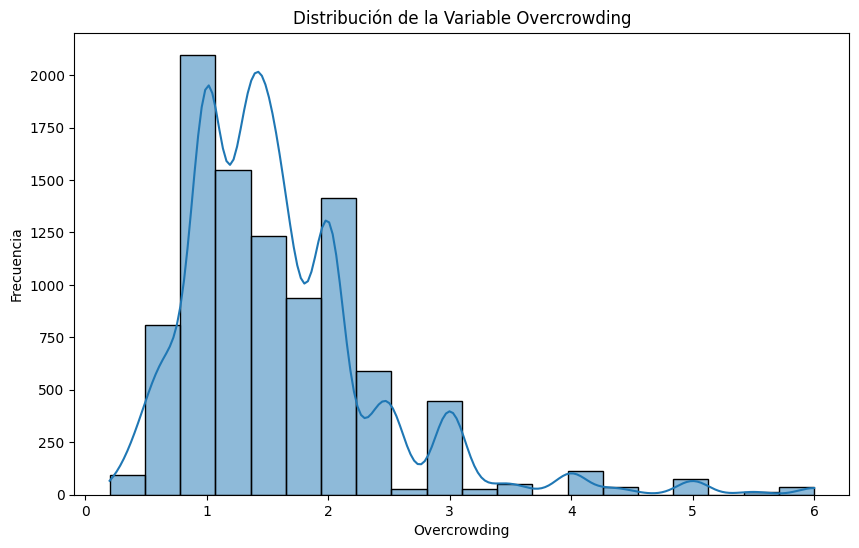

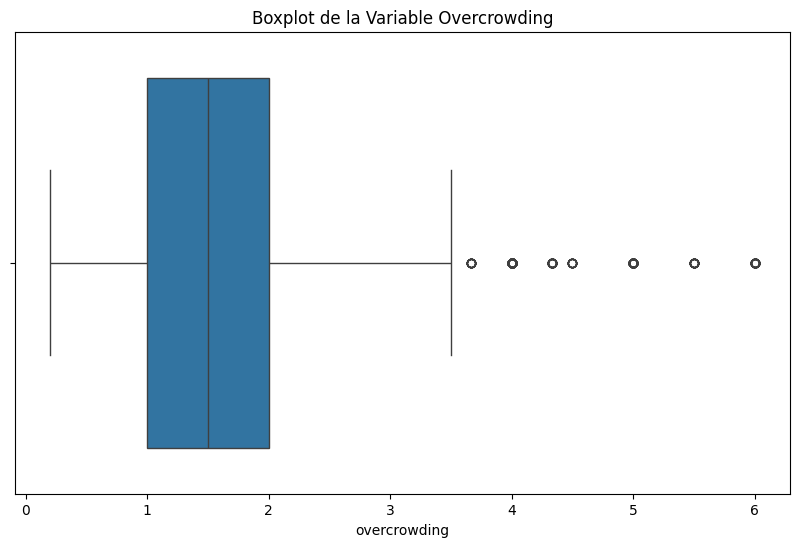

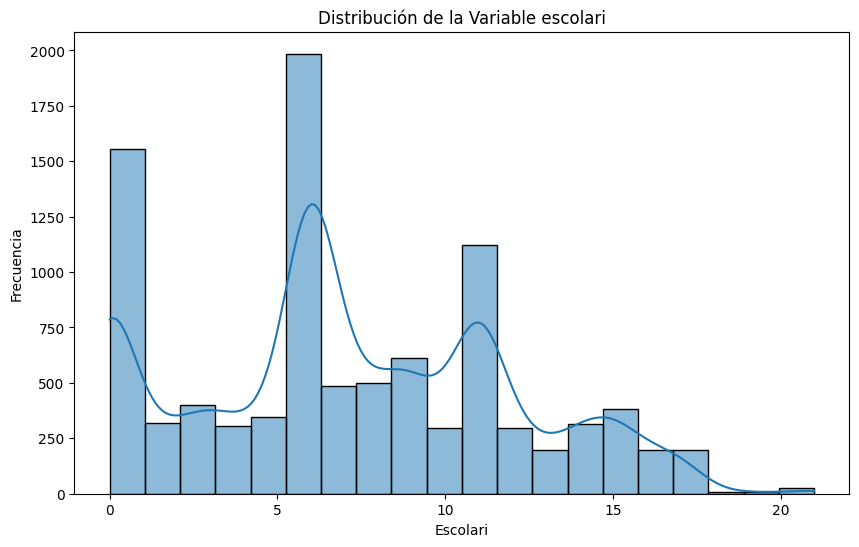

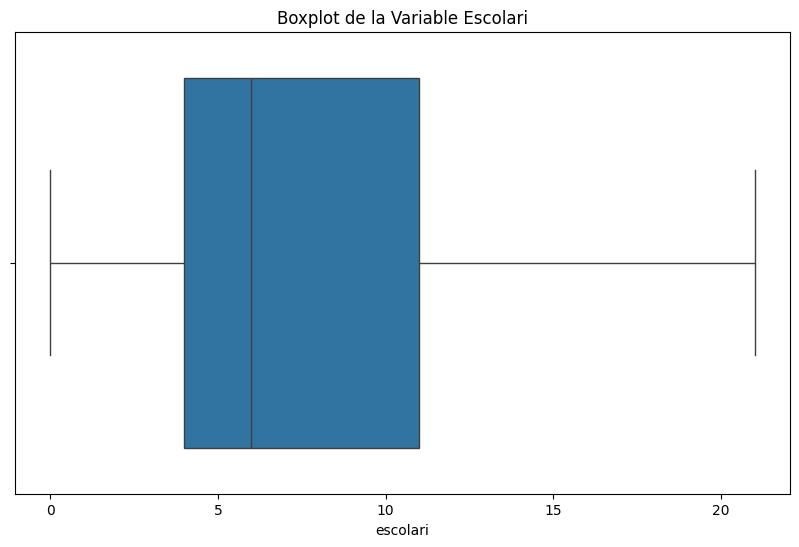

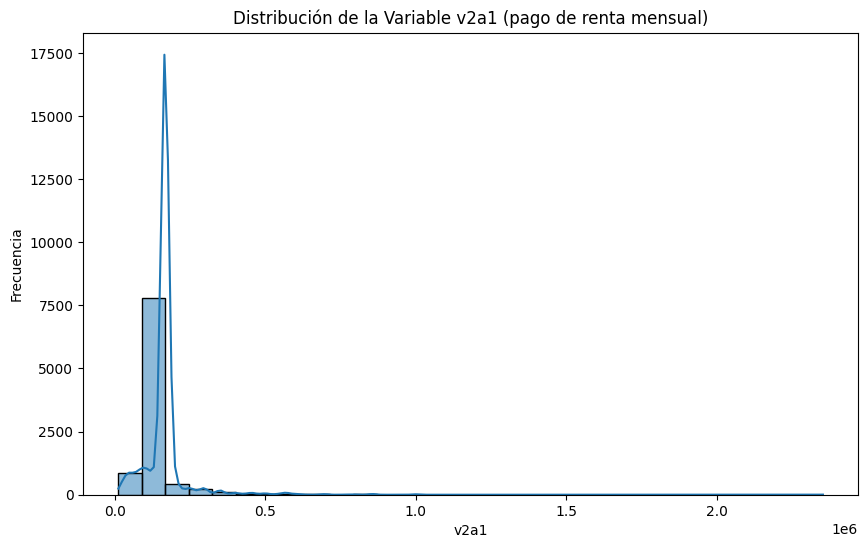

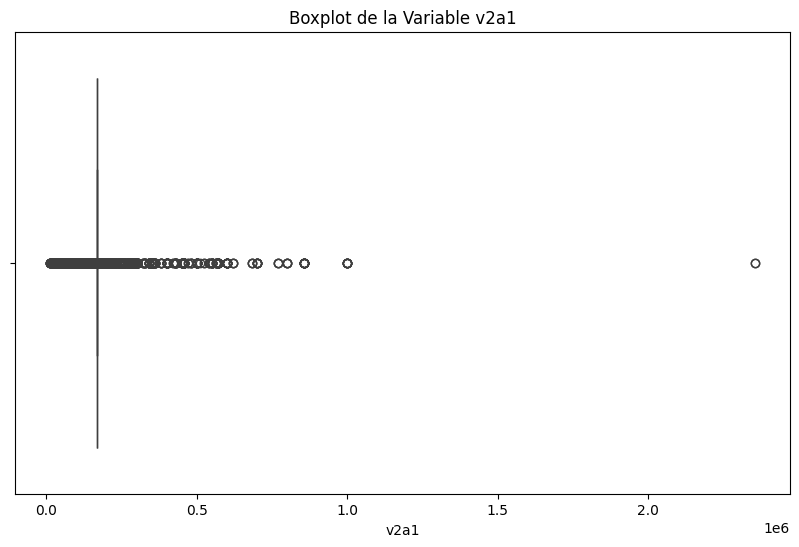

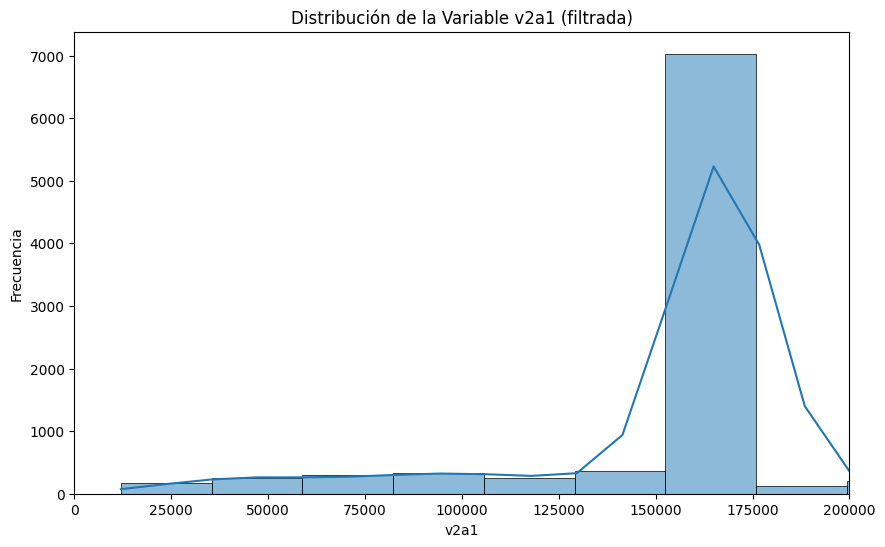

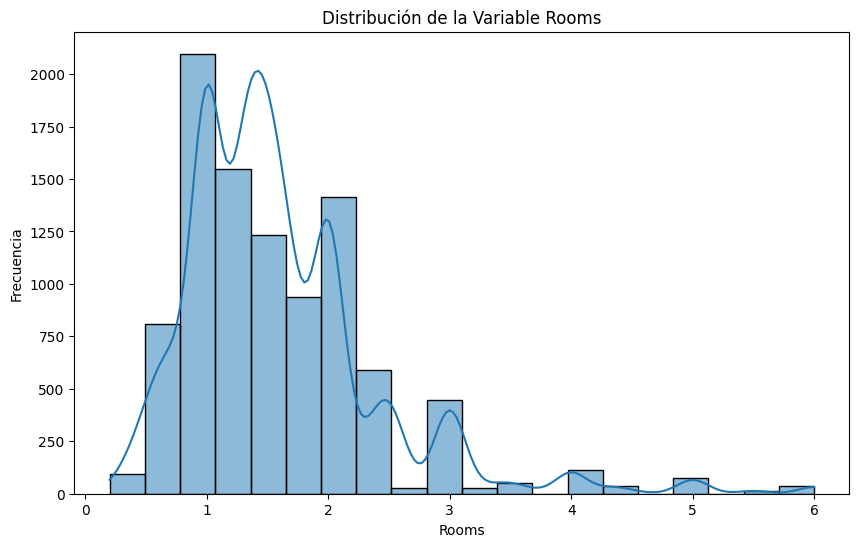

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para ver la distribución de la variable overcrowding
plt.figure(figsize=(10,6))
sns.histplot(df['overcrowding'], bins=20, kde=True)
plt.title('Distribución de la Variable Overcrowding')
plt.xlabel('Overcrowding')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para analizar la dispersión de los valores de overcrowding
plt.figure(figsize=(10,6))
sns.boxplot(x=df['overcrowding'])
plt.title('Boxplot de la Variable Overcrowding')
plt.show()

# Histograma para ver la distribución de la variable escolari
plt.figure(figsize=(10,6))
sns.histplot(df['escolari'], bins=20, kde=True)
plt.title('Distribución de la Variable escolari')
plt.xlabel('Escolari')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para analizar la dispersión de los valores de escolari
plt.figure(figsize=(10,6))
sns.boxplot(x=df['escolari'])
plt.title('Boxplot de la Variable Escolari')
plt.show()

# Histograma para ver la distribución de la variable v2a1
plt.figure(figsize=(10,6))
sns.histplot(df['v2a1'], bins=30, kde=True)
plt.title('Distribución de la Variable v2a1 (pago de renta mensual)')
plt.xlabel('v2a1')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para analizar la dispersión de los valores de v2a1
plt.figure(figsize=(10,6))
sns.boxplot(x=df['v2a1'])
plt.title('Boxplot de la Variable v2a1')
plt.show()

df_filtered = df[df['v2a1'] > 0]
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['v2a1'], bins=100, kde=True)
plt.xlim(0, 200000)  # Ajustar los límites del eje X a un rango razonable
plt.title('Distribución de la Variable v2a1 (filtrada)')
plt.xlabel('v2a1')
plt.ylabel('Frecuencia')
plt.show()


# Histograma para ver la distribución de la variable overcrowding
plt.figure(figsize=(10,6))
sns.histplot(df['overcrowding'], bins=20, kde=True)
plt.title('Distribución de la Variable Rooms')
plt.xlabel('Rooms')
plt.ylabel('Frecuencia')
plt.show()


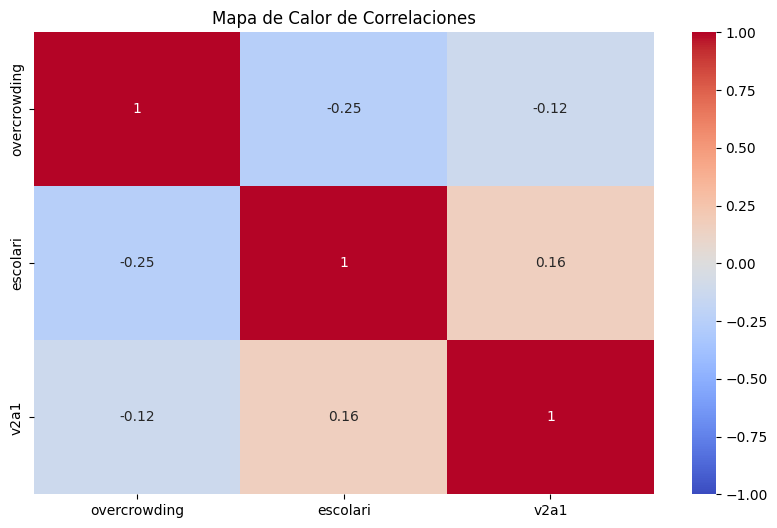

In [ ]:
# Mapa de calor de correlaciones con overcrowding
plt.figure(figsize=(10,6))
sns.heatmap(df[['overcrowding', 'escolari', 'v2a1']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


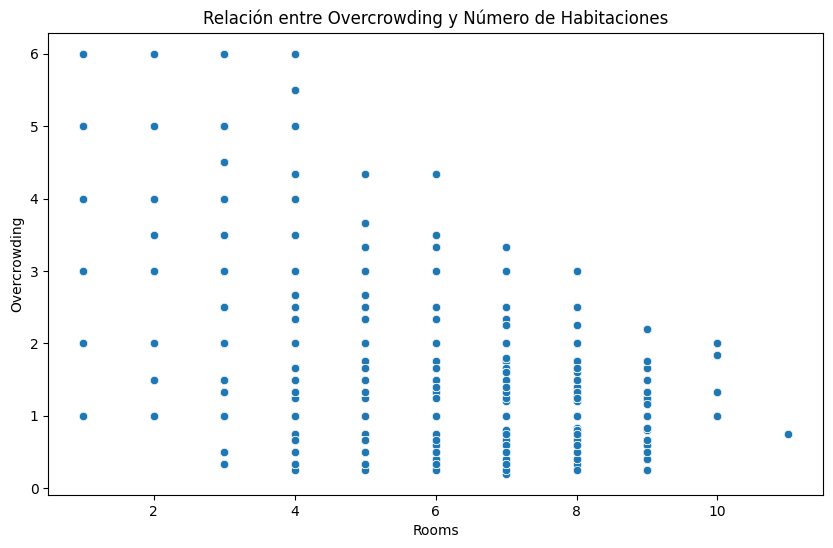

In [ ]:
# Scatter plot entre overcrowding y rooms
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['rooms'], y=df['overcrowding'])
plt.title('Relación entre Overcrowding y Número de Habitaciones')
plt.xlabel('Rooms')
plt.ylabel('Overcrowding')
plt.show()


Código Kendall

In [ ]:
from sklearn.model_selection import train_test_split
data = df.drop('Target', axis=1)
target = df['Target']
# Dividir los datos en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_val)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))



Random Forest Accuracy: 0.7432008368200836
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.44      0.51       151
           2       0.63      0.58      0.61       319
           3       0.56      0.41      0.48       242
           4       0.80      0.89      0.84      1200

    accuracy                           0.74      1912
   macro avg       0.65      0.58      0.61      1912
weighted avg       0.73      0.74      0.73      1912



In [ ]:
import xgboost as xgb
# Restar 1 a los valores de la variable objetivo
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Crear y entrenar el modelo con las clases ajustadas
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_adjusted)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_val)

# Como restamos 1 antes, volvemos a sumar 1 para obtener los valores originales
y_pred_xgb_adjusted = y_pred_xgb + 1

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_val, y_pred_xgb_adjusted)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb_adjusted))



XGBoost Accuracy: 0.7515690376569037
XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.40      0.52       151
           2       0.64      0.55      0.59       319
           3       0.71      0.30      0.42       242
           4       0.77      0.94      0.85      1200

    accuracy                           0.75      1912
   macro avg       0.72      0.55      0.60      1912
weighted avg       0.74      0.75      0.73      1912



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_val)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))



KNN Accuracy: 0.627092050209205
KNN Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.25      0.28       151
           2       0.43      0.42      0.42       319
           3       0.25      0.19      0.21       242
           4       0.75      0.82      0.79      1200

    accuracy                           0.63      1912
   macro avg       0.44      0.42      0.42      1912
weighted avg       0.60      0.63      0.61      1912



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Definir los hiperparámetros para cada modelo

# Hiperparámetros para KNN
knn_params = {
    'n_neighbors': [5, 10, 20, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Hiperparámetros para Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4]
}

# Hiperparámetros para XGBoost
xgb_params = {
    'learning_rate': [ 0.1, 0.3],
    'n_estimators': [100, 200],
    'max_depth': [ 6, 10],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Definir los modelos
models = {
    'KNN': (KNeighborsClassifier(), knn_params),
    'Random Forest': (RandomForestClassifier(random_state=41), rf_params),
    'XGBoost': (XGBClassifier(random_state=41), xgb_params)
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
for model_name, (model, params) in models.items():
    print(f"Evaluating {model_name} with hyperparameter tuning...")

    # Definir el GridSearchCV
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

    # Ajustar el modelo
    grid_search.fit(X_train, y_train_adjusted)

    # Mostrar los mejores hiperparámetros y resultados
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")

    # Evaluar en el conjunto de validación
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    y_pred_adjusted = y_pred + 1  # Ajustar de vuelta a la escala original

    print(f"Accuracy on Validation Set for {model_name}: {accuracy_score(y_val, y_pred_adjusted):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred_adjusted))

    print("------" * 10)


Evaluating KNN with hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best Cross-Validation Accuracy for KNN: 0.6797
Accuracy on Validation Set for KNN: 0.7008
Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.38      0.41       151
           2       0.57      0.48      0.52       319
           3       0.50      0.35      0.41       242
           4       0.77      0.87      0.82      1200

    accuracy                           0.70      1912
   macro avg       0.58      0.52      0.54      1912
weighted avg       0.68      0.70      0.69      1912

------------------------------------------------------------
Evaluating Random Forest with hyperparameter tuning...
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.7334
Accuracy on Validation Set for Random Forest: 0.7401
Clas